[View in Colaboratory](https://colab.research.google.com/github/olley102/NotANumPyCopy/blob/master/CustomLinearReg.ipynb)

# Matrix class

In [0]:
class Mat(object):
  m = 1  # vertical length
  n = 1  # horizontal length
  values = []
  is_float = False


  def __init__(self, vals:list):
    # False for int, True for float:
    vals_float = False

    m_temp = len(vals)
    n_temp = len(vals[0])

    for row in vals:
      if len(row) != n_temp:
        raise TypeError
      for num in row:
        if type(num) == float:
          vals_float = True
        elif type(num) != int:
          raise TypeError
    
    self.values = vals[:]
    self.m = m_temp
    self.n = n_temp

    if vals_float:
      self.makefloat()


  def __repr__(self):
    text = "\n"
    for row in self.values:
      text += "{}\n".format(row)
    return text  


  def zeros(vert_num, hor_num):  # no need for self here
    return Mat([[0]*hor_num for i in range(vert_num)])
  

  def ones(vert_num, hor_num):
    return Mat([[1]*hor_num for i in range(vert_num)])


  def identity(num):
    temp_mat = Mat.zeros(num, num)
    for row_num in range(num):
      temp_mat.values[row_num][row_num] = 1
    return temp_mat


  def randuniform(vert_num, hor_num, start=0, stop=1):  # returns float
    import random
    new_values = [[random.uniform(start, stop) for i in range(hor_num)]
      for j in range(vert_num)
    ]
    return Mat(new_values)


  def randint(vert_num, hor_num, start, stop):  # inclusive
    import random
    new_values = [[random.randint(start, stop) for i in range(hor_num)]
      for j in range(vert_num)
    ]
    return Mat(new_values)


  def _check_float(obj):  # no need for self in private method
    if obj.is_float:
      return True

    for row in obj.values:

      for val in row:
        if type(val) == float:
          obj.is_float = True
          return True
        elif type(val) != int:
          raise TypeError
    
    return False


  def makefloat(self):  # makes elements all float
    self.is_float = True
    for row_num in range(self.m):
        self.values[row_num] = list(map(
          float, self.values[row_num]
        ))
    return
  

  def _add(val1, val2):  # used for map
    return val1 + val2
  

  def _mul(val1, val2):
    return val1 * val2


  def __add__(self, other):
    temp_mat = self.copy()

    if type(other) == type(temp_mat):

      if temp_mat.m == other.m and temp_mat.n == other.n:
        for row_num in range(len(temp_mat.values)):
          temp_mat.values[row_num] = list(map(
            Mat._add,
            temp_mat.values[row_num], other.values[row_num]
          ))
      else:
        raise TypeError

    elif type(other) in (int, float):

      for row_num in range(len(temp_mat.values)):
        temp_mat.values[row_num] = list(map(
          lambda x: x + other,
          temp_mat.values[row_num]
        ))

    else:
      raise TypeError
    
    if Mat._check_float(temp_mat):
      temp_mat.makefloat()
    
    return temp_mat

  
  def __sub__(self, other):
    return self + other * -1
  
  
  def power(self, other):
    if type(other) not in (int, float):
      raise TypeError
    temp_mat = self.copy()

    for row_num in range(len(temp_mat.values)):
      temp_mat.values[row_num] = list(map(
        lambda x: x ** other,
        temp_mat.values[row_num]
      ))

    return temp_mat
  

  def _check_mul_compat(obj, other):
    return obj.n == other.m and type(obj) == type(other)


  def matmul(self, other):
    new_values = [[0]*other.n for i in range(self.m)]
    other_tr = other.transpose()

    if Mat._check_mul_compat(self, other):

      for row_num in range(self.m):
        for col_num in range(other.n):
          new_values[row_num][col_num] = sum(map(
            Mat._mul,
            self.values[row_num], other_tr.values[col_num]
          ))

    else:
      raise TypeError

    return Mat(new_values)


  def __mul__(self, other):
    temp_mat = None

    if type(other) == int or type(other) == float:
      temp_mat = self.simplemul(other)

      if Mat._check_float(temp_mat):
        temp_mat.makefloat()

    else:
      temp_mat = self.matmul(other)

    return temp_mat


  def simplemul(self, other):  # allows other to be Fraction
    temp_mat = self.copy()
    for row_num in range(temp_mat.m):
      temp_mat.values[row_num] = list(map(
        lambda x: x * other,
        temp_mat.values[row_num]
      ))
    return temp_mat

  
  def dotmul(self, other):
    if type(self) != type(other) or \
      self.m != other.m or self.n != other.n:
      raise TypeError
    temp_mat = self.copy()
    
    for row_num in range(temp_mat.m):
      temp_mat.values[row_num] = list(map(
        Mat._mul,
        temp_mat.values[row_num], other.values[row_num]
      ))
    return temp_mat


  def cofactors(self):
    if self.m <= 2:
      return self

    temp_mat = Mat.zeros(self.m, self.m)
    for row_num in range(self.m):
      for col_num in range(self.m):
        square = self.deepcopy()
        square.delcol(col_num)
        square.delrow(row_num)
        temp_mat.values[row_num][col_num] = \
          square.det() * (-1)**(row_num + col_num)
    return temp_mat


  def inverse(self):
    the_det = self.det()  # includes dimension validation
    if self.det() == 0:
      return
    
    the_adj = self.cofactors().transpose()

    return the_adj * (1/the_det)


  def fracinverse(self):  # returns Mat of Fraction
    the_det = self.det()
    if self.det() == 0:
      return
    
    from fractions import Fraction
    the_adj = self.cofactors().transpose()

    return the_adj.simplemul(Fraction(1, the_det))


  def det(self):
    if self.m != self.n:
      raise TypeError
    if self.m == 1:
      return self.values[0][0]
    if self.m == 2:
      return self.values[0][0] * self.values[1][1] \
        - self.values[0][1] * self.values[1][0]
    
    dets = []
    for col_num in range(self.m):
      new_square = self.deepcopy()
      new_square.delrow(0)
      new_square.delcol(col_num)
      dets.append(new_square.det())
    
    return sum((-1)**i * dets[i] * self.values[0][i]
      for i in range(self.m)
    )


  def copy(self):
    new_values = self.values[:]
    return Mat(new_values)


  def deepcopy(self):
    import copy
    new_values = copy.deepcopy(self.values)
    return Mat(new_values)


  def get(self, key1, key2):
    if key2 == "all":
      return self.values[key1]
    return self.values[key1][key2]


  def alter(self, key1, key2, val):
    self.values[key1][key2] = val
    if Mat._check_float(self):
      self.makefloat()
    return


  def delcol(self, col_num):
    for row_num in range(self.m):
      del self.values[row_num][col_num]
    self.n -= 1
    return
  

  def delrow(self, row_num):
    del self.values[row_num]
    self.m -= 1
    return


  def insert(self, vals:list, pos:int = 0, orientation:str = "r"):
    """
    pos - index of matrix at which to insert new values
    orientation - 'r' for row or 'c' for column
    """
    if orientation == "r":
      if len(vals) != self.n or pos < 0 or pos > self.m:
        raise TypeError
      self.values.insert(pos, vals)
      self.m += 1
    
    elif orientation == "c":
      if len(vals) != self.m or pos < 0 or pos > self.n:
        raise TypeError
      for row_num in range(self.n):
        self.values[row_num].insert(pos, vals[row_num])
      self.n += 1
    
    else:
      raise TypeError

    if Mat._check_float(self):
      self.makefloat()
    
    return
  

  def transpose(self):
    new_values = list(map(list, zip(*self.values)))
    return Mat(new_values)


# Linear Regression

## Data

In [34]:
from google.colab import files

data = files.upload()

Saving ex1data1.txt to ex1data1 (1).txt


In [0]:
data1 = data["ex1data1.txt"].split()
for row_num in range(len(data1)):
  data1[row_num] = list(map(float, data1[row_num].split(b",")))

In [0]:
datamat = Mat(data1)

A short snippet of the data is shown below.

In [256]:
for i in range(10):
  print(datamat.get(i, "all"))

[6.1101, 17.592]
[5.5277, 9.1302]
[8.5186, 13.662]
[7.0032, 11.854]
[5.8598, 6.8233]
[8.3829, 11.886]
[7.4764, 4.3483]
[8.5781, 12.0]
[6.4862, 6.5987]
[5.0546, 3.8166]


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

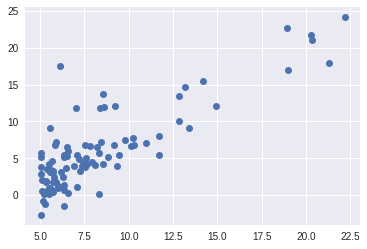

In [259]:
data_t = datamat.transpose()
x_plot = data_t.get(0, "all")
y_plot = data_t.get(1, "all")
plt.plot(x_plot, y_plot, "o")

## Gradient descent

**Using the cost function J shown below.**

![alt text](https://i.stack.imgur.com/tPhVh.png)

Hypothesis function h is used in "predictions" in the code below. It is simply X\*theta.

In [0]:
def cost(X, y, theta):
  predictions = X*theta
  sqr_errors = (predictions - y).power(2)
  J_mat = (sqr_errors.transpose() * Mat.ones(y.m, 1)) * (1/(2*y.m))
  
  return J_mat.get(0, 0)

In [0]:
def graddesc(X, y, theta, alpha, num_iters):
  J_history = Mat.zeros(1, num_iters)

  for itr in range(num_iters):
    x = X.deepcopy()
    x.delcol(0)
    h = x*theta.get(1, 0) + theta.get(0, 0)
    
    temp_theta = ((h-y).transpose() * Mat.ones(y.m, 1)).get(0, 0)
    theta_zero = theta.get(0, 0) - alpha * (1/y.m) * temp_theta
    
    temp_theta = (((h-y).dotmul(x)).transpose() * Mat.ones(y.m, 1)).get(0, 0)
    theta_one = theta.get(1, 0) - alpha * (1/y.m) * temp_theta
    
    theta = Mat([
      [theta_zero],
      [theta_one]
    ])
    
    J_history.values[0][itr] = cost(X, y, theta)
  
  return theta, J_history

In [0]:
the_X = Mat([x_plot])
the_X.insert([1]*the_X.n)  # bias
the_X = the_X.transpose()

the_y = Mat([y_plot]).transpose()

the_theta = Mat.zeros(2, 1)

### Before training

In [263]:
the_theta


[0]
[0]

In [0]:
iterations = 5000
the_alpha = 0.01

In [265]:
cost(the_X, the_y, the_theta)

32.072733877455654

Text(0,0.5,'y')

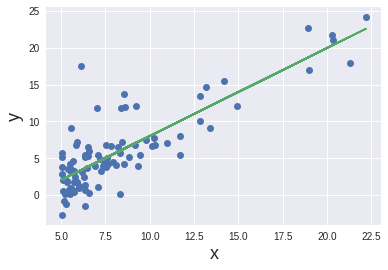

In [275]:
pred_mat = (the_X * the_theta).transpose()
pred = pred_mat.get(0, "all")
plt.plot(x_plot, y_plot, "o")
plt.plot(x_plot, pred, "-")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)

### After training

In [0]:
the_theta, J_hist = graddesc(the_X, the_y, the_theta, the_alpha, iterations)

In [269]:
the_theta


[-3.895300510657168]
[1.1929853860482198]

In [270]:
J_hist


[6.737190464870008, 5.931593568604957, 5.901154707081387, 5.89522858644422, 5.890094943117333, 5.885004158443646, 5.879932480491416, 5.874879094762575, 5.8698439118063845, 5.86482686531293, 5.859827889932179, 5.854846920572289, 5.849883892376585, 5.844938740722035, 5.840011401218365, 5.835101809707228, 5.830209902261389, 5.825335615183866, 5.820478885007097, 5.8156396484921515, 5.81081784262787, 5.806013404630041, 5.801226271940627, 5.7964563822269, 5.791703673380652, 5.786968083517397, 5.782249550975539, 5.777548014315597, 5.7728634123193805, 5.768195683989212, 5.76354476854712, 5.758910605434048, 5.754293134309077, 5.7496922950486296, 5.745108027745686, 5.740540272709014, 5.735988970462384, 5.7314540617437935, 5.7269354875047025, 5.722433188909259, 5.717947107333528, 5.713477184364749, 5.709023361800547, 5.704585581648198, 5.700163786123851, 5.695757917651815, 5.69136791886375, 5.6869937325979825, 5.682635301898705, 5.678292570015293, 5.673965480401505, 5.6696539767147955, 5.6653580

Text(0,0.5,'y')

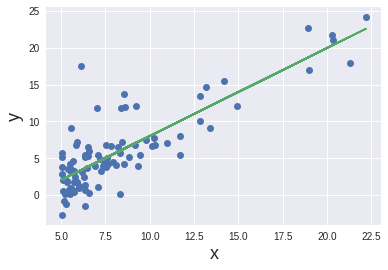

In [276]:
pred_mat = (the_X * the_theta).transpose()
pred = pred_mat.get(0, "all")
plt.plot(x_plot, y_plot, "o")
plt.plot(x_plot, pred, "-")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)

In [0]:
some_data = Mat([[1.0, 7.4764]])  # y = 4.3483
some_pred = some_data * the_theta

In [273]:
some_pred.get(0, 0)

5.023935429593743

Text(0,0.5,'cost')

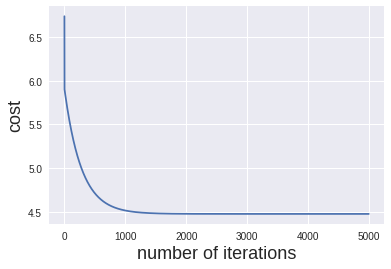

In [277]:
J_plot = J_hist.get(0, "all")
linear = range(len(J_plot))
plt.plot(linear, J_plot, "-")
plt.xlabel("number of iterations", fontsize=18)
plt.ylabel("cost", fontsize=18)